In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/wine-quality.csv')
df['quality'] = df['quality'].apply(lambda x: 1 if x =='good' else 0)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [3]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<AxesSubplot: >

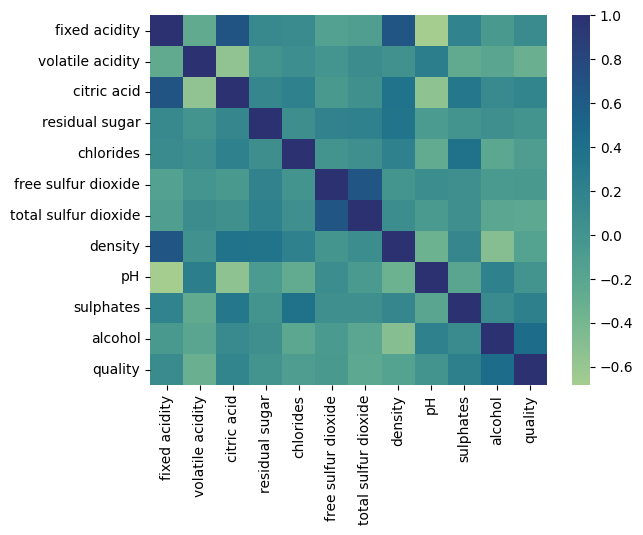

In [4]:
corr = df.corr()
sns.heatmap(corr, cmap="crest")

<AxesSubplot: >

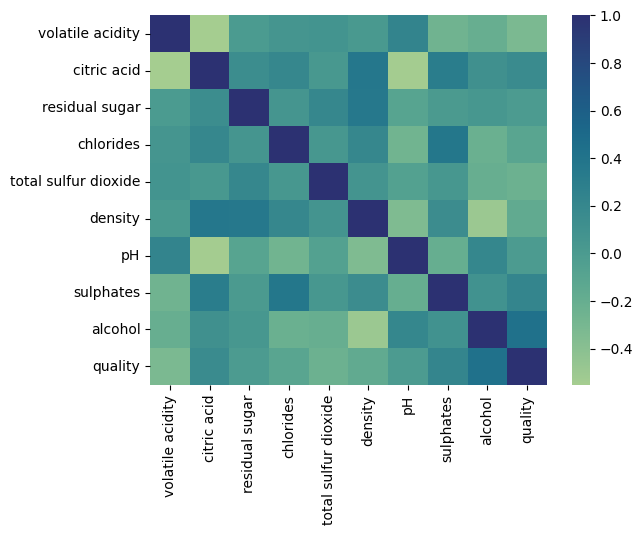

In [5]:
# drop high correlating columns because naive bayes assserts indipendent features
df1 = df.drop(['fixed acidity','free sulfur dioxide'], axis=1)
corr = df1.corr()
sns.heatmap(corr, cmap="crest")

array([[<AxesSubplot: title={'center': 'volatile acidity'}>,
        <AxesSubplot: title={'center': 'citric acid'}>,
        <AxesSubplot: title={'center': 'residual sugar'}>],
       [<AxesSubplot: title={'center': 'chlorides'}>,
        <AxesSubplot: title={'center': 'total sulfur dioxide'}>,
        <AxesSubplot: title={'center': 'density'}>],
       [<AxesSubplot: title={'center': 'pH'}>,
        <AxesSubplot: title={'center': 'sulphates'}>,
        <AxesSubplot: title={'center': 'alcohol'}>],
       [<AxesSubplot: title={'center': 'quality'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

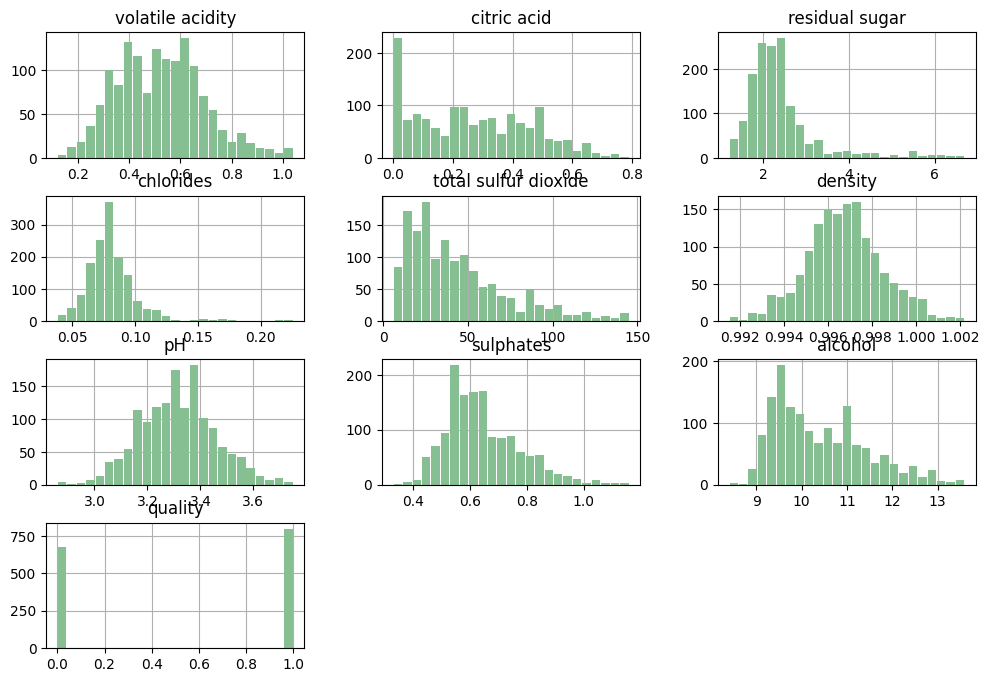

In [6]:
#outlier removal
standard_deviations = 3
df1 = df1[df1.apply(lambda x: np.abs(x - x.mean()) / x.std() < standard_deviations)
   .all(axis=1)]

df1.hist( bins=25, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

       volatile acidity  citric acid  residual sugar    chlorides  \
count       1478.000000  1478.000000     1478.000000  1478.000000   
mean           0.523126     0.266069        0.825680    -2.533849   
std            0.169809     0.192416        0.292855     0.233159   
min            0.120000     0.000000        0.182322    -3.270169   
25%            0.390000     0.090000        0.641854    -2.659260   
50%            0.520000     0.250000        0.788457    -2.538307   
75%            0.630000     0.420000        0.955511    -2.419119   
max            1.040000     0.790000        1.902108    -1.487220   

       total sulfur dioxide      density           pH    sulphates  \
count           1478.000000  1478.000000  1478.000000  1478.000000   
mean               3.560802     0.996734     3.315074     0.643633   
std                0.684668     0.001736     0.142275     0.130528   
min                1.791759     0.991500     2.860000     0.330000   
25%                3.044522 

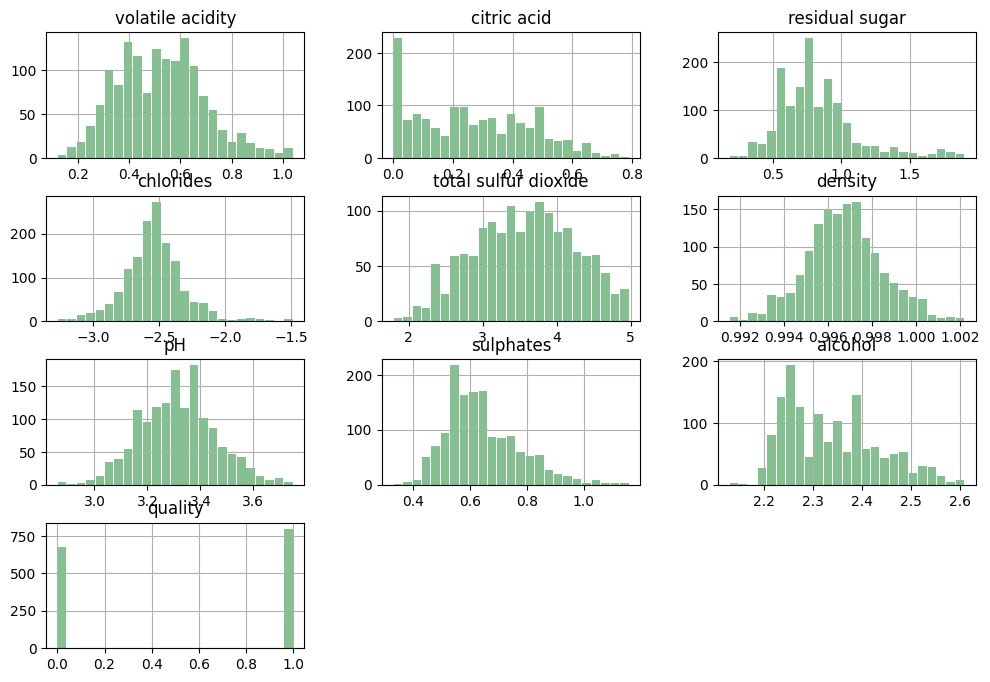

In [7]:
##transforming data
df1['chlorides'] = np.log(df1['chlorides'])
df1['residual sugar'] = np.log(df1['residual sugar'])
df1['total sulfur dioxide'] = np.log(df1['total sulfur dioxide'])
df1['alcohol'] = np.log(df1['alcohol'])
#df1['citric acid'] = np.log(df1['citric acid'])


print(df1.describe())
df1.hist( bins=25, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

#dropping citric acid because no gausion distribution
df1 = df1.drop(['citric acid'], axis=1)
print('-------shape--------')
print(df.shape)
print(df1.shape)
df1.to_csv('../data/wine-quality-preprocessed.csv', index=False) 